<a href="https://colab.research.google.com/github/Derevenitckaia/ML_itmo_course/blob/main/task_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import io # чтобы считать данные из строки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Задача 1
Перед вами результаты наблюдений длительности нахождения человека в очереди в зависимости от количества людей в этой очереди.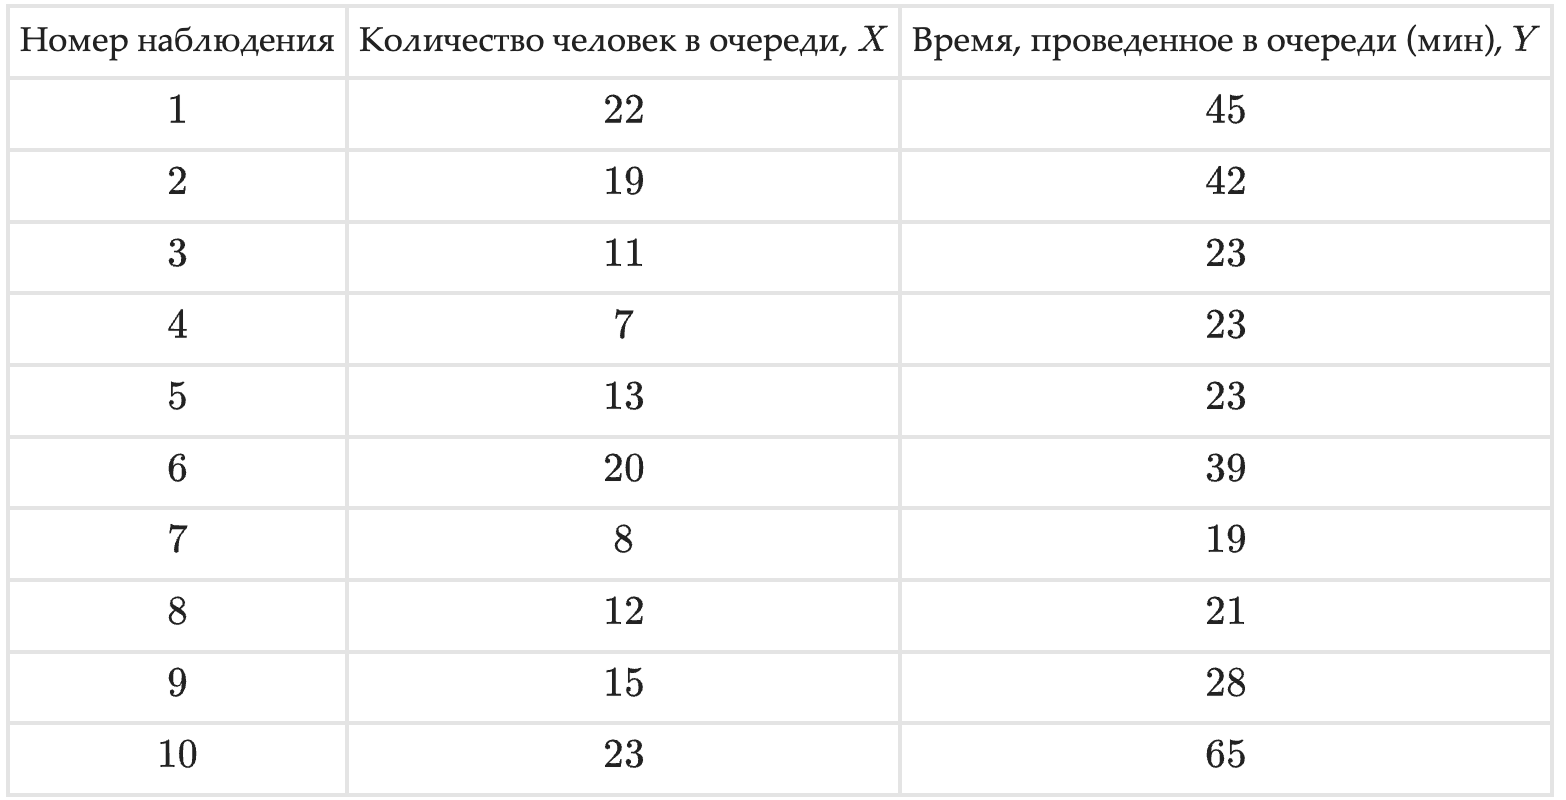

In [7]:
data_str = '''id,X,Y
1,22,45
2,19,42
3,11,23
4,7,23
5,13,23
6,20,39
7,8,19
8,12,21
9,15,28
10,23,65
'''
df = pd.read_csv(io.StringIO(data_str), index_col = 'id')
df


,X,Y
id,,
1,22,45
2,19,42
3,11,23
4,7,23
5,13,23
6,20,39
7,8,19
8,12,21
9,15,28


In [14]:
print(df.X.mean())
print(df.Y.mean())

15.0
32.8


Обучим на всех даннах

In [11]:
X_train = pd.DataFrame(df.X)
Y_train = pd.DataFrame(df.Y)
reg_model = LinearRegression().fit(X_train, Y_train)

Найдем коэффициент k и свободный член b 

In [12]:
print('k = ', reg_model.intercept_)
print('b = ', reg_model.coef_)

k =  [-1.65945946]
b =  [[2.2972973]]


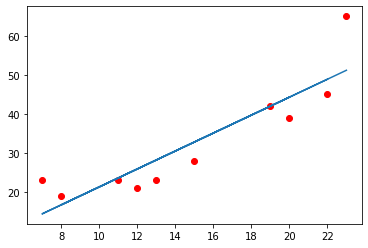

In [13]:
plt.scatter(df.X, df.Y, color = 'red')
plt.plot(df.X, reg_model.predict(X_train))

plt.show()

Вычислим метрику $R^2 $ для оценки точности модели

In [15]:
from sklearn.metrics import r2_score
y_predicted = reg_model.predict(X_train)
r2_score(Y_train, y_predicted)

0.8012731648349212

# Задача 2

В прилагаемом файле представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель линейной многомерной регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — winpercent.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Boston Baked Beans, Peanut M&Ms. Обучите модель.

In [17]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+INTROMLADVML+fall_2022_ITMO+type@asset+block/candy-data.csv')
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1


In [54]:
df_train = df.loc[(df.competitorname != 'Boston Baked Beans') & (df.competitorname != 'Peanut M&Ms')]
df_test = df.loc[(df.competitorname == 'Boston Baked Beans') | (df.competitorname == 'Peanut M&Ms')]

X_train = pd.DataFrame(df_train.loc[:, ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
                                    'nougat', 'crispedricewafer', 'hard', 'bar', 
                                    'pluribus', 'sugarpercent', 'pricepercent']])
Y_train = pd.DataFrame(df_train.loc[:, 'winpercent'])

X_test = pd.DataFrame(df_test.loc[:, ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
                                    'nougat', 'crispedricewafer', 'hard', 'bar', 
                                    'pluribus', 'sugarpercent', 'pricepercent']])
Y_test = pd.DataFrame(df_test.loc[:, 'winpercent'])

reg_model = LinearRegression().fit(X_train, Y_train)
y_predicted = reg_model.predict(X_test)

print('winpercent для конфеты Boston Baked Beans: ', y_predicted[0])
print('winpercent для конфеты Boston Peanut M&Ms: ', y_predicted[1])


winpercent для конфеты Boston Baked Beans:  [44.00469576]
winpercent для конфеты Boston Peanut M&Ms:  [68.48757158]


In [57]:
df_test

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,0
47,Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788,1


In [58]:
test_candy = (1, 1, 1, 1, 1, 1, 0, 0, 0, 0.261, 0.273)
param = ('chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
         'nougat', 'crispedricewafer', 'hard', 'bar',
         'pluribus', 'sugarpercent', 'pricepercent')


test_candy = pd.DataFrame(dict(zip(param, test_candy)), index=[0])
y_predicted = reg_model.predict(test_candy)
print(y_predicted)

[[92.06541738]]
